In [2]:
from pickletools import optimize
import pandas_datareader as pdr
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

(252, 7)


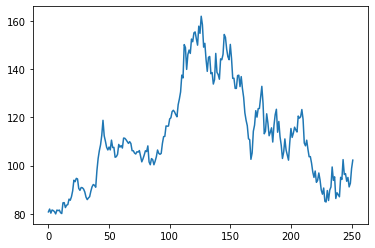

In [91]:
nvda = pd.read_csv("AMD.csv")
df = nvda.Close
plt.plot(df)
print(nvda.shape)

In [92]:
# Data PreProcessing
scl = MinMaxScaler(feature_range=(0,1))
df = scl.fit_transform(np.array(df).reshape(-1,1))

tr_size = int(len(df)*0.65)
te_size = len(df)-tr_size

tr_data, te_data = df[0:tr_size,:], df[tr_size:len(df),:1]

In [93]:
def create_dataset(dataset, time_step=1):
    dataX,dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [94]:
time_step = 30
X_train, y_train = create_dataset(tr_data, time_step)
X_test, y_test = create_dataset(te_data, time_step)

In [95]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [96]:
# Model Creating LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [97]:
model = Sequential()
model.add(LSTM(50,return_sequences=True, input_shape=(30,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [98]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 30, 50)            10400     
                                                                 
 lstm_10 (LSTM)              (None, 30, 50)            20200     
                                                                 
 lstm_11 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [99]:
model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs = 150, batch_size=64, verbose=1)

Epoch 1/150
3/3 [==============================] - 7s 665ms/step - loss: 0.3045 - val_loss: 0.0323
Epoch 2/150
3/3 [==============================] - 0s 64ms/step - loss: 0.1477 - val_loss: 0.0115
Epoch 3/150
3/3 [==============================] - 0s 62ms/step - loss: 0.0302 - val_loss: 0.1136
Epoch 4/150
3/3 [==============================] - 0s 65ms/step - loss: 0.0590 - val_loss: 0.0742
Epoch 5/150
3/3 [==============================] - 0s 60ms/step - loss: 0.0247 - val_loss: 0.0223
Epoch 6/150
3/3 [==============================] - 0s 59ms/step - loss: 0.0220 - val_loss: 0.0123
Epoch 7/150
3/3 [==============================] - 0s 59ms/step - loss: 0.0340 - val_loss: 0.0131
Epoch 8/150
3/3 [==============================] - 0s 58ms/step - loss: 0.0273 - val_loss: 0.0240
Epoch 9/150
3/3 [==============================] - 0s 71ms/step - loss: 0.0159 - val_loss: 0.0541
Epoch 10/150
3/3 [==============================] - 0s 62ms/step - loss: 0.0228 - val_loss: 0.0622
Epoch 11/150
3/3 [

In [100]:
train_Predict = model.predict(X_train)
test_Predict = model.predict(X_test)

train_Predict = scl.inverse_transform(train_Predict)
test_Predict = scl.inverse_transform(test_Predict)

In [101]:
import math
from sklearn.metrics import mean_squared_error

In [102]:
math.sqrt(mean_squared_error(y_train, train_Predict))

123.56735202208013

In [103]:
math.sqrt(mean_squared_error(y_test, test_Predict))

105.62350530433429

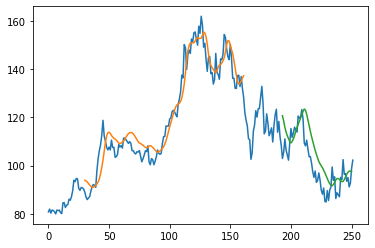

In [104]:
look_back = 30
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_Predict)+look_back, :] = train_Predict

testPreditPlot = np.empty_like(df)
testPreditPlot[:, :] = np.nan
testPreditPlot[len(train_Predict)+(look_back*2)+1:len(df)-1, :] = test_Predict

plt.plot(scl.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPreditPlot)
plt.show()

In [106]:
len(te_data) - 30

59

In [107]:
x_input=te_data[59:].reshape(1,-1)
x_input.shape

(1, 30)

In [108]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.16998168578513206,
 0.20707748584030006,
 0.17156799441317927,
 0.12068332393634396,
 0.0998169554718148,
 0.13093352465323227,
 0.06345338233963516,
 0.06040274189122996,
 0.11812079816224552,
 0.06784621916740596,
 0.12056127391328408,
 0.13630259082961638,
 0.23746184030129125,
 0.1697376833595069,
 0.18767536377819638,
 0.07809641988429405,
 0.10701651574029791,
 0.09713237967465671,
 0.08663817653214301,
 0.18499088560153243,
 0.17425257021033735,
 0.27467969037951867,
 0.1991458084718848,
 0.203904795368835,
 0.16522269888818186,
 0.1843807209041658,
 0.1366687531013574,
 0.15485054576872825,
 0.22928614830468896,
 0.27211716460542024]

In [109]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=30
i=0
while(i<10):
    
    if(len(temp_input)>200):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.21811858]
31
[0.21811858]
32
[0.21811858]
33
[0.21811858]
34
[0.21811858]
35
[0.21811858]
36
[0.21811858]
37
[0.21811858]
38
[0.21811858]
39
[0.21811858]
40
[[0.2181185781955719], [0.2181185781955719], [0.2181185781955719], [0.2181185781955719], [0.2181185781955719], [0.2181185781955719], [0.2181185781955719], [0.2181185781955719], [0.2181185781955719], [0.2181185781955719]]


In [110]:
day_new=np.arange(1,31)
day_pred=np.arange(31,41)

In [113]:
len(df)-30

222

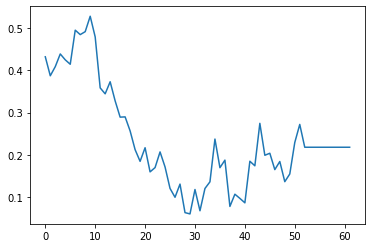

In [112]:
df1 = df.tolist()
df1.extend(lst_output)
plt.plot(df1[200:])

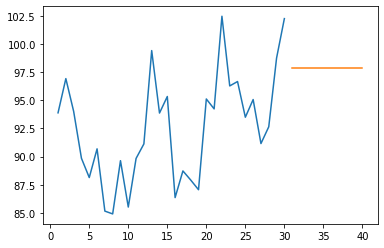

In [114]:
plt.plot(day_new,scl.inverse_transform(df[222:]))
plt.plot(day_pred,scl.inverse_transform(lst_output))